In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Bar Chart: Payroll Employment Quarterly Change 

### 1.1 Import Dataset

In [54]:
payroll_employ = pd.read_fwf('/Users/Sure/Documents/Course/IS 597PR/Final Project/table_e.txt', 
                            skiprows=7, skipfooter=1, header=None)
payroll_employ = payroll_employ.rename(columns={0: 'Year', 1: 'Month', 2: 'Total'})
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,NaN,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,NaN,June,677,65,50,48,62,45,61,56,66,224
4,NaN,September,"1,045",115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,NaN,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,NaN,September,"4,040",401,289,363,452,254,288,227,273,",493"
113,NaN,December,"1,893",175,87,101,158,147,204,154,153,714


### 1.2 Convert missing values to corresponding years

In [80]:
def add_year(df: pd.DataFrame):
    year = df['Year']
    pd.options.display.float_format = '{:.0f}'.format
    year.astype(float).sum()
    for i in range(1, len(year)):
        if year.isnull()[i]:
            df.loc[i,'Year'] = year[i - 1]
    
    return df
    

add_year(payroll_employ)
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,1992,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,1993,June,677,65,50,48,62,45,61,56,66,224
4,1993,September,1045,115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,2020,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,2020,September,4040,401,289,363,452,254,288,227,273,",493"
113,2020,December,1893,175,87,101,158,147,204,154,153,714


### 1.3 Convert string type to float

In [84]:
payroll_employ['Total'] = payroll_employ['Total'].astype(str).str.replace(',', '').astype(float)  
# Remove the thousands separator first, then convert to float
payroll_employ

,Year,Month,Total,3,4,5,6,7,8,9,10,11
0,1992,September,694,66,41,64,111,80,74,43,26,189
1,1992,December,193,11,37,36,53,44,51,27,25,-91
2,1993,March,340,50,0,6,21,33,63,42,42,83
3,1993,June,677,65,50,48,62,45,61,56,66,224
4,1993,September,1045,115,77,100,147,113,134,83,48,228
...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020,March,-610,-69,-63,-95,-141,-57,-45,-27,-29,-84
111,2020,June,-15320,-809,-778,",205",",908",",291",",528",",087",",122",",592"
112,2020,September,4040,401,289,363,452,254,288,227,273,",493"
113,2020,December,1893,175,87,101,158,147,204,154,153,714


### 1.4 Bar chart visualization 

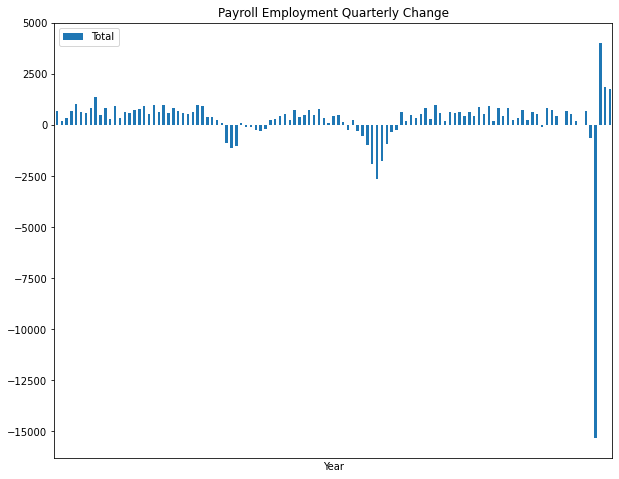

In [86]:
payroll_total = pd.DataFrame({'Year':payroll_employ['Year'], 'Total':payroll_employ['Total']})
payroll_fig = payroll_total.plot.bar(x='Year', y='Total', rot=0, figsize=(10,8), 
                                     title = 'Payroll Employment Quarterly Change')
payroll_fig = payroll_fig.set_xticks(range(1994,2022,50))

## 2. Line Charts: data sourced from Bureau of Labor Statistics

### 2.1 Import and process data

In [87]:
def read_txt(path):
    txt_to_df = pd.read_fwf(path, skiprows=11, skipfooter=1, header=None)

    
    txt_to_df = txt_to_df.rename(columns={0: 'Year', 1: 'Month', 2: 'Net change', 3: 'Total Job Gains', 
                                          6: 'Total Job Losses'})
    str_to_num(txt_to_df, 'Net change')
    str_to_num(txt_to_df, 'Total Job Gains')
    str_to_num(txt_to_df, 'Total Job Losses')

    add_year(txt_to_df)  # Convert missing values to corresponding years by the function
    
    return txt_to_df

job_class1 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.01.table1_d.txt')
job_class2 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.02.table1_d.txt')
job_class3 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.03.table1_d.txt')
job_class4 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.04.table1_d.txt')
job_class5 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.05.table1_d.txt')
job_class6 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.06.table1_d.txt')
job_class7 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.07.table1_d.txt')
job_class8 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.08.table1_d.txt')
job_class9 = read_txt('/Users/Sure/Documents/Course/IS 597PR/Final Project/f.09.table1_d.txt')

# Create lists based on the number of employees
small_list = [job_class1, job_class2, job_class3, job_class4]  # 1-49 employees
medium_list = [job_class5, job_class6, job_class7]  # 50-499 employees
large_list = [job_class8, job_class9]  # 499+ employees

### 2.2 Calculate net job creation, total job gains, and total job losses based on firm size

In [88]:
def classify_firm(df_list):
    net_change, total_job_gains, total_job_losses, gains_minus_losses = 0,0,0,0
    
    for df in df_list:
        net_change += df['Net change']
        total_job_gains += df['Total Job Gains']
        total_job_losses += df['Total Job Losses']
    
    size_firm = pd.DataFrame({'Year': df['Year'], 'Month': df['Month'], 'Net Change': net_change,
                              'Total Job Gains': total_job_gains, 'Total Job Losses': total_job_losses})
    
    return size_firm

small_firm = classify_firm(small_list)
medium_firm = classify_firm(medium_list)
large_firm = classify_firm(large_list)
small_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses
0,1992,September,282,3341,3059
1,1992,December,137,3259,3122
2,1993,March,77,3178,3101
3,1993,June,225,3249,3024
4,1993,September,439,3412,2973
...,...,...,...,...,...
110,2020,March,-368,3026,3394
111,2020,June,-474,2552,5252
112,2020,September,1505,4483,2978
113,2020,December,521,3496,2975


### 2.3 Calculate contribution to job gains relative to job losses based on firm size

In [97]:
def create_relative(main_firm, small_firm, medium_firm, large_firm):
    main_firm['Gains Relative to Losses'] = (main_firm['Total Job Gains']/(small_firm['Total Job Gains']+
                                          medium_firm['Total Job Gains']+large_firm['Total Job Gains'])
                                         )/(main_firm['Total Job Losses']/(small_firm['Total Job Losses']+
                                          medium_firm['Total Job Losses']+large_firm['Total Job Losses']))
    return main_firm

small_firm = create_relative(small_firm, small_firm, medium_firm, large_firm)
medium_firm = create_relative(medium_firm, small_firm, medium_firm, large_firm)
large_firm = create_relative(large_firm, small_firm, medium_firm, large_firm)
small_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses,Gains Relative to Losses
0,1992,September,282,3341,3059,1
1,1992,December,137,3259,3122,1
2,1993,March,77,3178,3101,1
3,1993,June,225,3249,3024,1
4,1993,September,439,3412,2973,1
...,...,...,...,...,...,...
110,2020,March,-368,3026,3394,1
111,2020,June,-474,2552,5252,1
112,2020,September,1505,4483,2978,1
113,2020,December,521,3496,2975,1


### 2.4 Line chart visualization 

In [61]:
def create_line(small_firm, medium_firm, large_firm, column_name, title):
    firm_df = pd.DataFrame({'Year': small_firm['Year'], 'Month': small_firm['Month'],
                       '1-49 employees': small_firm[column_name],
                       '50-499 employees': medium_firm[column_name],
                       '499+ employees': large_firm[column_name]})
    
    firm_df = firm_df.set_index(['Year', 'Month'])

    line = firm_df.plot.line(figsize=(14,9), title=title, xlabel='Year')
    line = line.set_xticklabels(range(1987, 2025, 5))
    
    return line

### 2.5.1 Line chart 1:  Net Job Creation

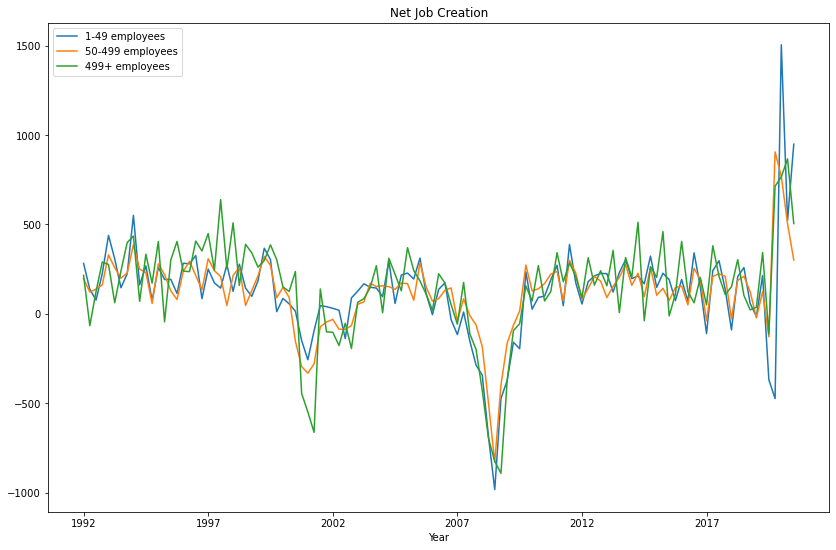

In [62]:
net_job_creation = create_line(small_firm, medium_firm, large_firm, 'Net Change', 'Net Job Creation')

### 2.5.2 Line chart 2:  Gross Job Gains

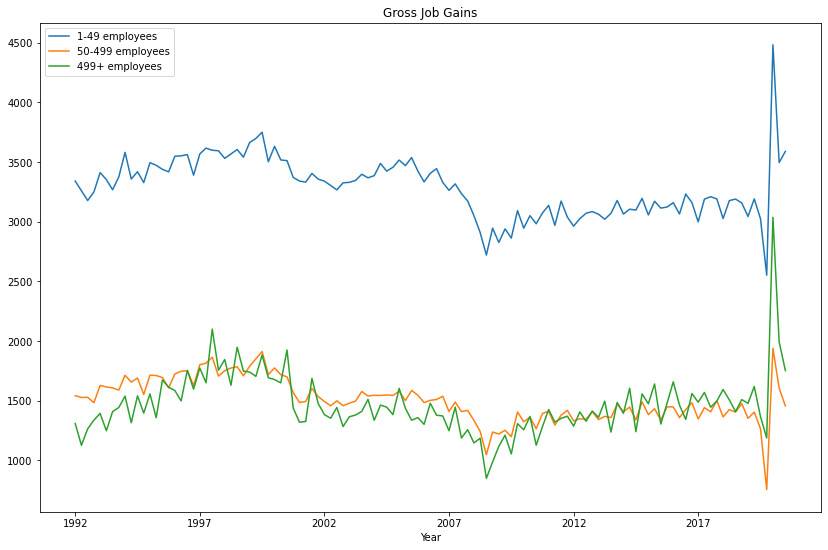

In [63]:
total_job_gains_line = create_line(small_firm, medium_firm, large_firm, 'Total Job Gains', 'Gross Job Gains')

### 2.5.3 Line chart 3:  Gross Job Losses

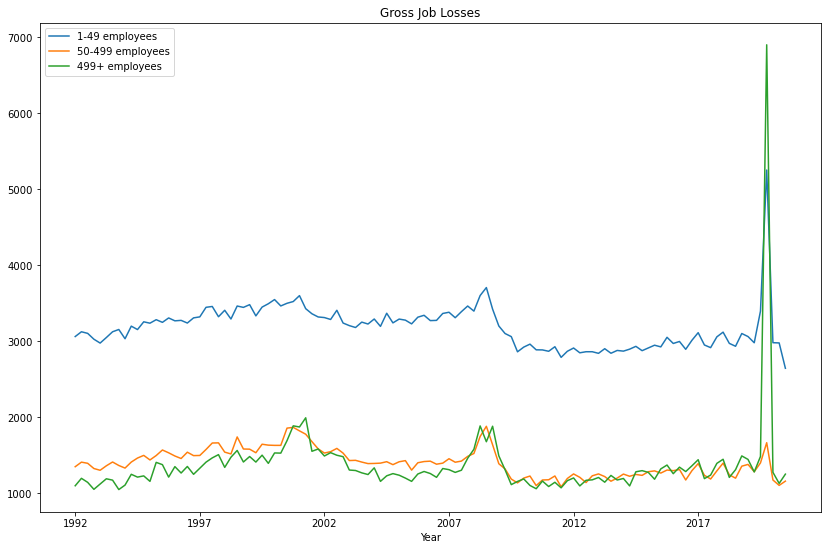

In [64]:
total_job_losses_line = create_line(small_firm, medium_firm, large_firm, 'Total Job Losses', 'Gross Job Losses')

### 2.5.4 Line chart 4:  Contribution to Job Gains Relative to Job Losses

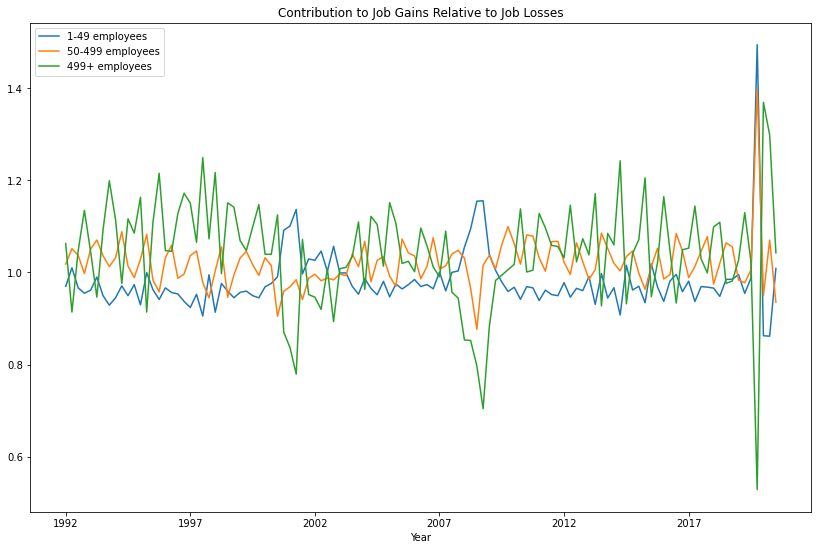

In [65]:
contribution_line = create_line(small_firm, medium_firm, large_firm, 'Gains Relative to Losses', 
                               'Contribution to Job Gains Relative to Job Losses')

## 3. Line Chart: data sourced from Job Openings and Labor Turnover Survey (JOLTS)

### 3.1 Import and process data

In [100]:
def read_xlsx(path):
    xlsx_to_df = pd.read_excel(path, skiprows=13)
    return xlsx_to_df

jplt_class1 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-1.xlsx')
jplt_class2 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-2.xlsx')
jplt_class3 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-3.xlsx')
jplt_class4 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-4.xlsx')
jplt_class5 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-5.xlsx')
jplt_class6 = read_xlsx('/Users/Sure/Documents/Course/IS 597PR/Final Project/SeriesReport-6.xlsx')
jplt_class1

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,567
1,2001,752,635,602,436,507,533,514,546,580,543,495,408
2,2002,520,271,365,309,389,338,211,321,287,310,343,286
3,2003,302,361,302,369,404,397,334,299,252,335,407,452
4,2004,339,364,458,421,443,325,522,469,535,516,407,612
5,2005,465,557,486,562,462,414,539,521,505,467,456,482
6,2006,510,460,515,516,442,457,332,463,368,388,433,436
7,2007,510,572,566,532,473,675,524,603,552,637,427,454
8,2008,515,411,489,437,350,460,477,370,402,388,412,414
9,2009,334,408,274,250,307,248,200,253,309,274,328,266


### 3.2 Calculate job openings group by year and month based on firm size

In [67]:
small_jplt = jplt_class1 + jplt_class2  # 1-49 employees
medium_jplt = jplt_class3  # 50-249 employees
large_jplt = jplt_class4 + jplt_class5 + jplt_class6  # 250+ employees

def create_jplt(jplt_df, column_name):
    jplt_df['Year'] = jplt_class1['Year']
    jplt_df = jplt_df.set_index(['Year'])
    jplt_df = jplt_df.stack().reset_index(level=1, name=column_name
                                         ).rename(columns={'level_1':'Month'})[['Month', column_name]]
    jplt_df.reset_index(level=0, inplace=True)
    jplt_df = jplt_df.set_index(['Year','Month'])
    
    return jplt_df


small_jplt = create_jplt(small_jplt, '1-49 employees')
medium_jplt = create_jplt(medium_jplt, '50-249 employees')
large_jplt = create_jplt(large_jplt, '250+ employees')
jplt = pd.concat([small_jplt, medium_jplt, large_jplt], axis=1)  # Merge three columns together

# Calculate the contribution of job openings for each firm size
jplt_contribution = jplt.div(jplt.sum(axis=1), axis=0)  
jplt_contribution

1-49 employees  50-249 employees  250+ employees
Year Month                                                  
2000 Dec                 0                 0               0
2001 Jan                 0                 0               0
     Feb                 0                 0               0
     Mar                 0                 0               0
     Apr                 0                 0               0
...                    ...               ...             ...
2021 May                 0                 0               0
     Jun                 0                 0               0
     Jul                 0                 0               0
     Aug                 0                 0               0
     Sep                 0                 0               0

[250 rows x 3 columns]

### 3.3 Line chart visualization
Only the line of 250+ employees is the same as the line in the paper.

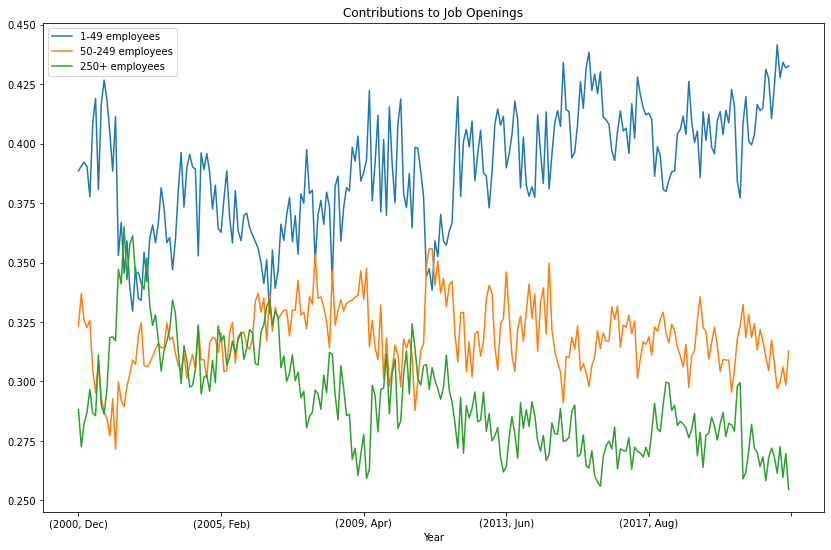

In [68]:
contributions_job_openings = jplt_contribution.plot.line(figsize=(14,9), title='Contributions to Job Openings', 
                                                         xlabel='Year')

## 4. Hypotheses

### 4.1 Hypotheses 1: the number of Covid-19 cases in the United States is negatively correlated with job gains in the beginning.

In [69]:
sum_firm = small_firm + medium_firm + large_firm
sum_firm['Year'] = small_firm['Year'].astype(int)
sum_firm['Month'] = small_firm['Month']
sum_firm = sum_firm.drop('Gains Relative to Losses', 1)
sum_firm

,Year,Month,Net Change,Total Job Gains,Total Job Losses
0,1992,September,694,6192,5498
1,1992,December,193,5912,5719
2,1993,March,340,5970,5630
3,1993,June,677,6069,5392
4,1993,September,1045,6433,5388
...,...,...,...,...,...
110,2020,March,-610,5659,6269
111,2020,June,1146,4494,13814
112,2020,September,3040,9459,5419
113,2020,December,1893,7092,5199


In [70]:
covidcase = pd.read_csv('/Users/Sure/Documents/Course/IS 597PR/Final Project/daily_case_trends__the_united_states.csv', 
                            skiprows=2)

month_dic = {'Jan':'March', 'Feb':'March', 'Mar':'March', 'Apr':'June', 'May':'June', 'Jun':'June', 'Jul':'September',
             'Aug':'September', 'Sep':'September', 'Oct':'December', 'Nov':'December', 'Dec':'December'}
# month_dic = {'Jan':'December', 'Feb':'December', 'Mar':'March', 'Apr':'March', 'May':'March', 'Jun':'June', 'Jul':'June',
#              'Aug':'June', 'Sep':'September', 'Oct':'September', 'Nov':'September', 'Dec':'December'}
covidcase['Year'] = covidcase['Date'].str[-4:].astype(int)
covidcase['Month'] = covidcase['Date'].str[:3].map(month_dic)
covidcase['New Cases'] = covidcase['New Cases']/1000

covidcase = pd.DataFrame(covidcase.groupby(['Year','Month'])['New Cases'].sum()).reset_index(level=['Year','Month'])
covidcase

,Year,Month,New Cases
0,2020,December,12745
1,2020,June,2483
2,2020,March,213
3,2020,September,4641
4,2021,December,4868
5,2021,June,3134
6,2021,March,10226
7,2021,September,9728


In [71]:
sum_firm_netchange = sum_firm
sum_firm_netchange = sum_firm_netchange.drop(sum_firm_netchange.columns[[2,4]], axis=1)
sum_firm_netchange

,Year,Month,Total Job Gains
0,1992,September,6192
1,1992,December,5912
2,1993,March,5970
3,1993,June,6069
4,1993,September,6433
...,...,...,...
110,2020,March,5659
111,2020,June,4494
112,2020,September,9459
113,2020,December,7092


In [72]:
def create_contrast(df1, df2, title):
    hypo_df = pd.merge(df1, df2, on=['Year','Month'], how='left')
    hypo_df = hypo_df.set_index(['Year','Month'])
    hypo_line = hypo_df.tail(10).plot.line(figsize=(14,9), title=title, xlabel='Year')
    
    return hypo_line

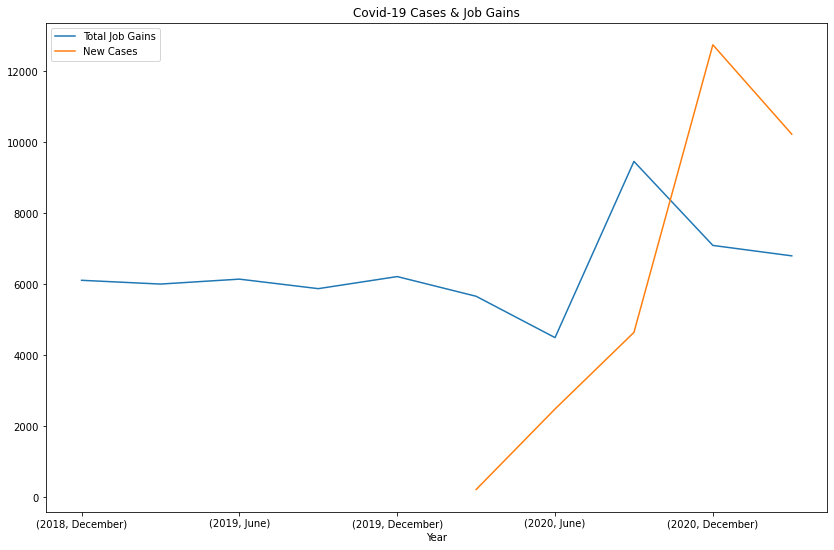

In [73]:
hypo_jobgain = create_contrast(sum_firm_netchange, covidcase, 'Covid-19 Cases & Job Gains')

### 4.2 Hypotheses 2: small firms have worse resilience capabilities during the epidemic.

In [74]:
all_firm = small_firm.drop(small_firm.columns[[3,4,5]], axis=1).rename({'Net Change':'Net Change of Small Firm'}, 
                                                                       axis=1)
all_firm['Year'] = all_firm['Year'].astype(int)
all_firm['Net Change of Medium Firm'] = medium_firm['Net Change']
all_firm['Net Change of Large Firm'] = large_firm['Net Change']
all_firm

,Year,Month,Net Change of Small Firm,Net Change of Medium Firm,Net Change of Large Firm
0,1992,September,282,197,215
1,1992,December,137,122,-66
2,1993,March,77,138,125
3,1993,June,225,162,290
4,1993,September,439,330,276
...,...,...,...,...,...
110,2020,March,-368,-129,-113
111,2020,June,-474,906,714
112,2020,September,1505,769,766
113,2020,December,521,505,867


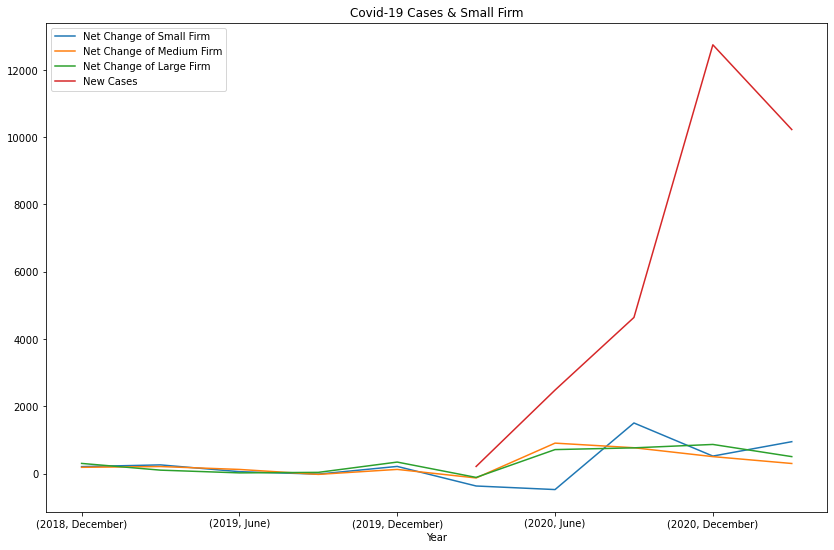

In [75]:
hypo_smallfirm = create_contrast(all_firm, covidcase, 'Covid-19 Cases & Small Firm')

### 4.3 Hypotheses 3: the increase in the coverage of the Covid-19 vaccination does not bring more job opportunities

In [76]:
vaccinations = pd.read_csv('/Users/Sure/Documents/Course/IS 597PR/Final Project/vaccinations_in_the_us.csv', 
                            skiprows=2)
month_dic = {'01':'March', '02':'March', '03':'March', '04':'June', '05':'June', '06':'June', '07':'September',
             '08':'September', '09':'September', '10':'December', '11':'December', '12':'December'}
vaccinations['Year'] = vaccinations['Date'].str[:4].astype(int)
vaccinations['Month'] = vaccinations['Date'].str[5:7].map(month_dic)
vaccinations = vaccinations[vaccinations['Total Doses Administered Daily'].notna()]
vaccinations['Daily Doses'] = vaccinations['Total Doses Administered Daily']/10000

vaccinations = pd.DataFrame(vaccinations.iloc[:, -3:].groupby(['Year','Month'])['Daily Doses'].
                            sum()).reset_index(level=['Year','Month'])
vaccinations

,Year,Month,Daily Doses
0,2020,December,559
1,2021,December,6260
2,2021,June,16499
3,2021,March,16547
4,2021,September,6211


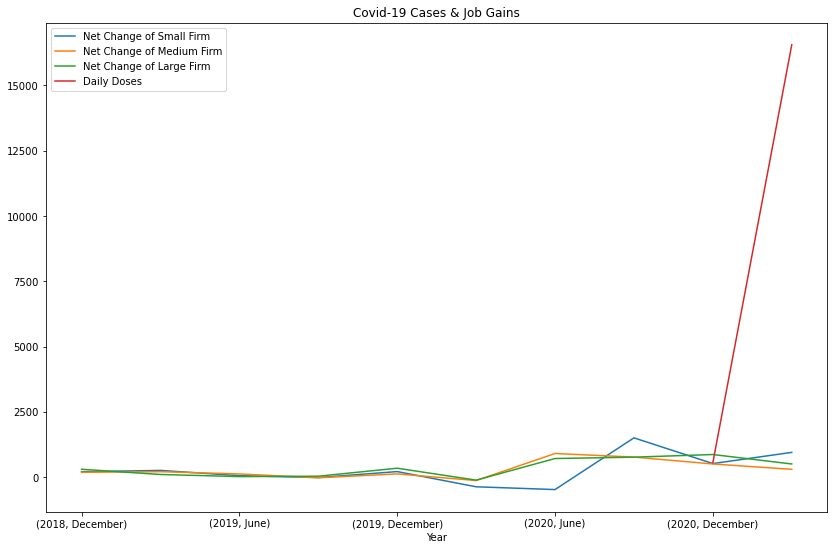

In [77]:
hypo_vaccine = create_contrast(all_firm, vaccinations, 'Covid-19 Cases & Job Gains')